<a href="https://colab.research.google.com/github/nicknaks/kis/blob/main/%D0%9D%D0%B0%D0%BA%D0%B0%D0%B7%D0%BD%D0%BE%D0%B8%CC%86_%D0%9D_%D0%90_%D0%9B%D0%B0%D0%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 3.  Модель однофазной одноканальной открытой системы обслуживания**

Наказной Никита, ИУ5-83Б, Вариант 16

In [ ]:
# Задание 1

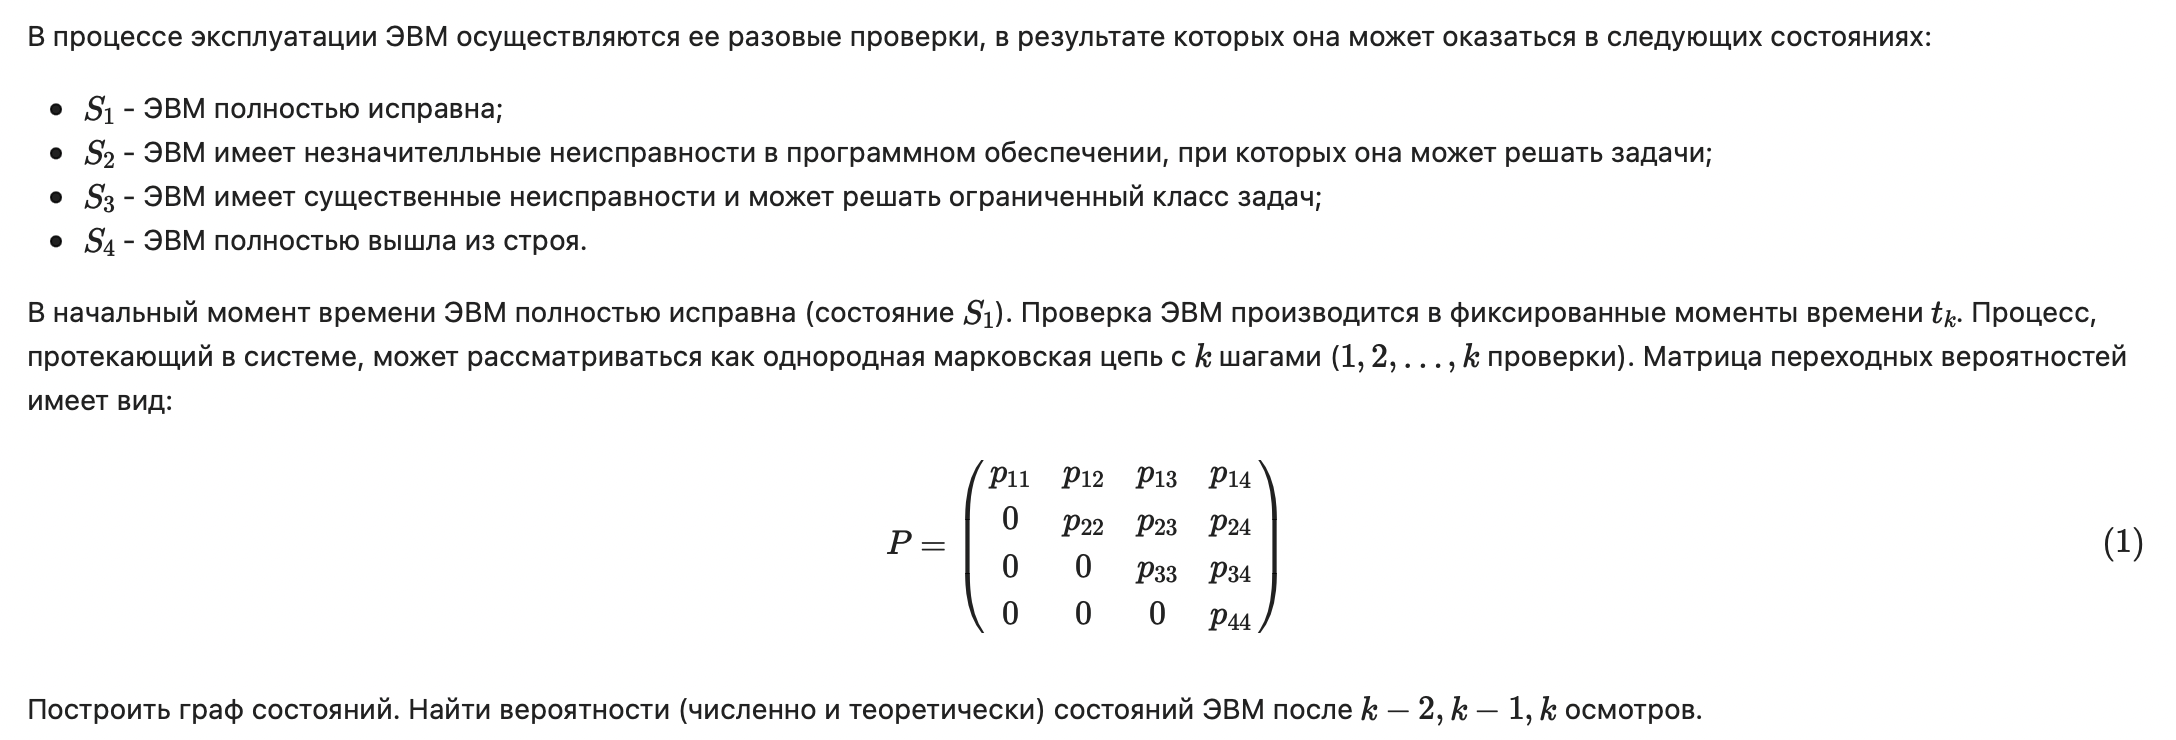

In [2]:
Variant<-16
set.seed(Variant) 
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

,,,,
,<dbl>,<dbl>,<dbl>,<dbl>
p1,0.1365943,0.2518568,0.1283789,0.4831701
p2,0.0000000,0.2555306,0.0610393,0.6834301
p3,0.0000000,0.0000000,0.8625410,0.1374590
p4,0.0000000,0.0000000,0.0000000,1.0000000


[1] "k= 4"


In [3]:
install.packages("matrixcalc")
library(matrixcalc)
# Стартовое состояние
p0<-matrix(c(1, 0, 0, 0), ncol=4, nrow=1, byrow=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Вероятность состояний ЭВМ после K осмотров.
ver = p0 %*% matrix.power(data.matrix(P),k)
# ver
ver_1<-c(ver)

new_matrix<-rbind(ver_1)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.875075


In [5]:
# Вероятность состояний ЭВМ после K-1 осмотров.
ver1 = p0 %*% matrix.power(data.matrix(P),k-1)
ver_2<-c(ver1)
new_matrix<-rbind(ver_1,ver_2)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.8750750
ver_2,0.0025485749,0.029935168,0.1323198,0.8351965


In [6]:
# Вероятность состояний ЭВМ после K-2 осмотров.
ver2 = p0 %*% matrix.power(data.matrix(P),k-2)
ver_3<-c(ver2)
new_matrix<-rbind(ver_1,ver_2, ver_3)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.8750750
ver_2,0.0025485749,0.029935168,0.1323198,0.8351965
ver_3,0.0186579933,0.098759311,0.1436410,0.7389417


In [7]:
# Экспериментальное решение
State <- function (state, pstate){
  prob = runif(1);
  result =0
  if (prob <= pstate[1]){
    result = 1
  }
  else {
    if (prob <= pstate[1]+pstate[2]){
      result = 2
    }
    else{
      if (prob <= pstate[1]+pstate[2]+pstate[3]){
        result = 3
      }
      else{
        if (prob <= pstate[1]+pstate[2]+pstate[3]+pstate[4]){
          result = 4
        }
      }
    }
  }
  return(result)
}

N <- 1000;
final <-c(0,0,0,0)

In [8]:
# Вероятность для К экспериментально
for (i in 1:N){
  st = 1
  for (i in 1:k){
    st = State(st,P[st,])
  }
  final[st] = final[st] +1
}
ver_1exp <- final/N
ver_1_exp<-c(ver_1exp)
new_matrix<-rbind(ver_1,ver_2, ver_3,ver_1_exp)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.8750750
ver_2,0.0025485749,0.029935168,0.1323198,0.8351965
ver_3,0.0186579933,0.098759311,0.1436410,0.7389417
ver_1_exp,0.0000000000,0.010000000,0.1160000,0.8740000


In [9]:
# Вероятность для K-1 экспериментально
final <-c(0,0,0,0)
for (i in 1:N){
  st = 1
  for (i in 1:(k-1)){
    st = State(st,P[st,])
  }
  final[st] = final[st] +1
}
ver_2exp<- final/N
ver_2_exp<-c(ver_2exp)
new_matrix<-rbind(ver_1,ver_2, ver_3,ver_1_exp,ver_2_exp)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.8750750
ver_2,0.0025485749,0.029935168,0.1323198,0.8351965
ver_3,0.0186579933,0.098759311,0.1436410,0.7389417
ver_1_exp,0.0000000000,0.010000000,0.1160000,0.8740000
ver_2_exp,0.0040000000,0.036000000,0.1420000,0.8180000


In [10]:
# Вероятность для K-2 экспериментально

final <-c(0,0,0,0)
for (i in 1:N){
  st = 1
  for (i in 1:(k-2)){
    st = State(st,P[st,])
  }
  final[st] = final[st] +1
}
ver_3exp<- final/N
ver_3_exp<-c(ver_3exp)
new_matrix<-rbind(ver_1,ver_2, ver_3,ver_1_exp,ver_2_exp,ver_3_exp)
new_matrix

ver_1,0.0003481207,0.008291227,0.1162856,0.8750750
ver_2,0.0025485749,0.029935168,0.1323198,0.8351965
ver_3,0.0186579933,0.098759311,0.1436410,0.7389417
ver_1_exp,0.0000000000,0.010000000,0.1160000,0.8740000
ver_2_exp,0.0040000000,0.036000000,0.1420000,0.8180000
ver_3_exp,0.0100000000,0.097000000,0.1290000,0.7640000


In [ ]:
# Полученные значения практически не отличаются

In [ ]:
# Задание 2

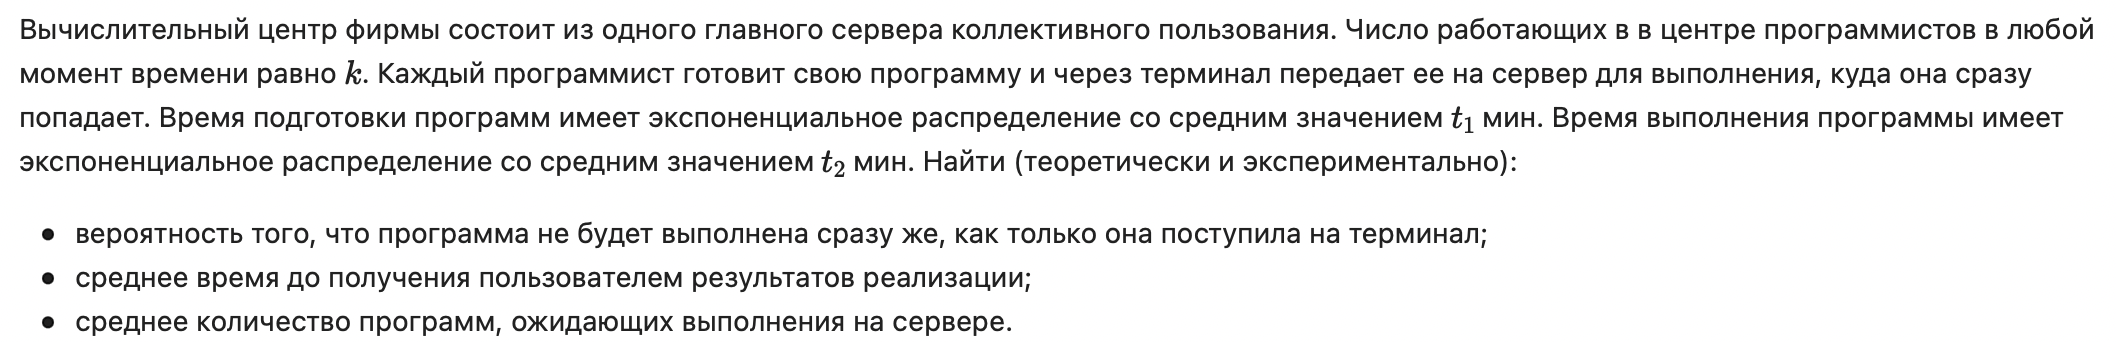

In [11]:
Variant<-16
set.seed(Variant) 
k<-sample(c(10:25),1)
t1<-sample(c(14:80),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k,t1,t2
<int>,<int>,<int>
10,72,2


In [12]:
# Экспериментальный расчет
timeFree <- 0
taskProcessedTime <- c()
queueLenght <- rep(0,N)
queueLeaveTimes <- rep(0,N)

N <- 10000

taskTimes <- matrix(nrow=N, ncol=k)
taskTimes[1,] <- rexp(k, 1/t1)
for (i in 2:N){
  taskTimes[i,] <- taskTimes[i-1,] + rexp(k, 1/t1)
}
vectorTaskTimes <- c(taskTimes)
sortVectorTaskTimes <- sort(vectorTaskTimes)

for (i in 1:N){
  getTask <- sortVectorTaskTimes[i]
  requireTask <- rexp(1, 1/t2)
  
  if (timeFree < getTask) {  
    timeFree <- getTask + requireTask
    taskProcessedTime <- c(taskProcessedTime, requireTask)
  } 
  else { 
    timeFree <- timeFree + requireTask
    taskProcessedTime <- c(taskProcessedTime, timeFree - getTask)
    queueLeaveTimes <- append(queueLeaveTimes, timeFree)
  }
  queueLeaveTimes <- queueLeaveTimes[queueLeaveTimes > getTask]
  queueLenght[i] <- length(queueLeaveTimes)
}

In [13]:
# Найдем вероятность того, что программа не будет выполнена сразу же, как поступила на терминал 

P <- (length(queueLenght[queueLenght > 0]))/N
P

[1] 0.272

In [14]:
# Cреднее время до получения пользователем результатов реализации
t <- sum(taskProcessedTime)/N
t

[1] 2.728837

In [15]:
# Cреднее количество программ, ожидающих выполнения на сервере
N <- sum(queueLenght)/N
N

[1] 0.4481

In [ ]:
# Полученные значения практически не отличаются